In [1]:
# binomial logistic regression


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("salespeople.csv")

# Display shape and column types
print("Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)

# Display first 5 rows
print("\nFirst few rows:\n", df.head())


Shape: (351, 4)

Column Types:
 promoted           int64
sales            float64
customer_rate    float64
performance      float64
dtype: object

First few rows:
    promoted  sales  customer_rate  performance
0         0  594.0           3.94          2.0
1         0  446.0           4.06          3.0
2         1  674.0           3.83          4.0
3         0  525.0           3.62          2.0
4         1  657.0           4.40          3.0


In [3]:
# Drop any rows with missing values
df_clean = df.dropna().copy()


In [4]:
# Convert performance_rating to ordered category
df_clean['performance'] = pd.Categorical(
    df_clean['performance'],       
    categories=[1, 2, 3, 4],
    ordered=True
)


# Convert Promoted to categorical
df_clean['promoted'] = df_clean['promoted'].astype('category')


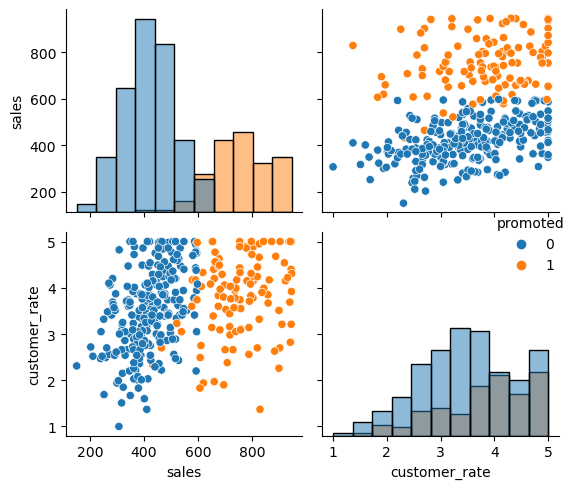

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot with Promoted as hue
sns.pairplot(df_clean, hue='promoted', diag_kind='hist')
plt.tight_layout()
plt.show()


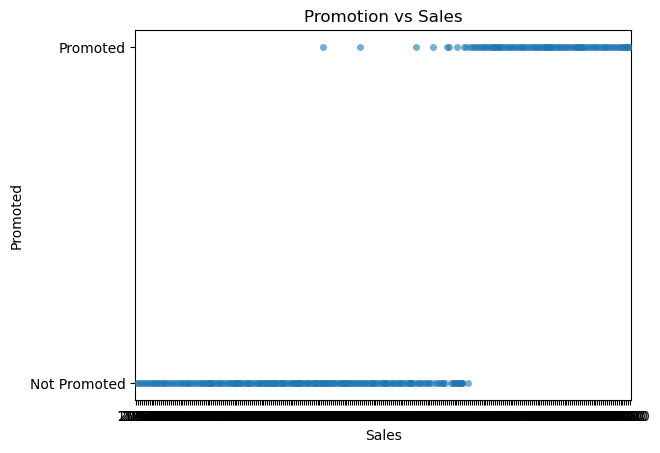

In [8]:
# Ensure promoted is numeric: 0 = Not Promoted, 1 = Promoted
df_clean['promoted_numeric'] = df_clean['promoted'].astype(int)

# Re-plot using numeric version of promotion
sns.stripplot(x='sales', y='promoted_numeric', data=df_clean, jitter=True, alpha=0.6)
plt.title("Promotion vs Sales")
plt.xlabel("Sales")
plt.ylabel("Promoted")
plt.yticks([1, 0], ["Promoted", "Not Promoted"])  # This now works as expected
plt.show()


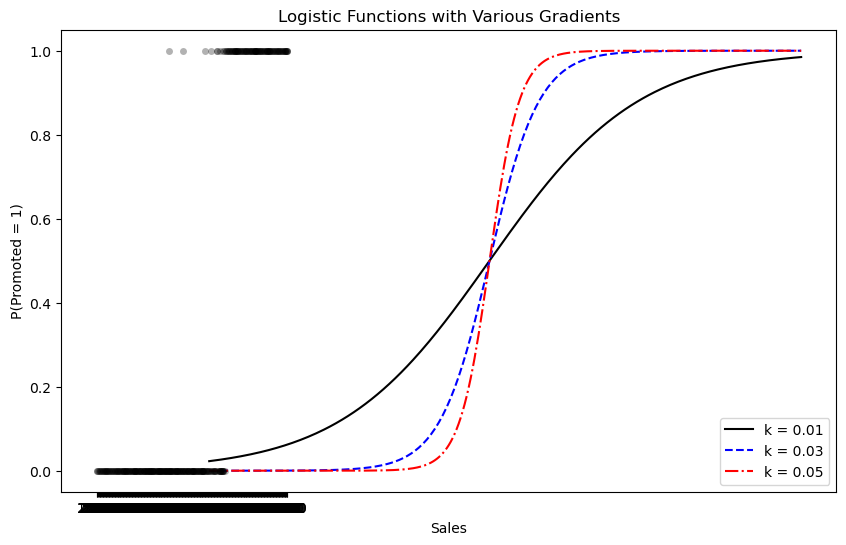

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute mean of sales (x₀)
x0 = df_clean['sales'].mean()

# Step 2: Create a range of x values (sales)
x_vals = np.linspace(df_clean['sales'].min(), df_clean['sales'].max(), 300)

# Step 3: Define k-values to plot
k_values = [0.01, 0.03, 0.05]
colors = ['black', 'blue', 'red']
linestyles = ['solid', 'dashed', 'dashdot']

# Step 4: Plot actual data points
plt.figure(figsize=(10, 6))
sns.stripplot(x='sales', y='promoted_numeric', data=df_clean, jitter=True, alpha=0.3, color='black')

# Step 5: Plot logistic curves
for k, color, ls in zip(k_values, colors, linestyles):
    y_vals = 1 / (1 + np.exp(-k * (x_vals - x0)))
    plt.plot(x_vals, y_vals, label=f"k = {k}", color=color, linestyle=ls)

plt.title("Logistic Functions with Various Gradients")
plt.xlabel("Sales")
plt.ylabel("P(Promoted = 1)")
plt.legend()
plt.show()
